In [115]:
import psycopg2

connection = psycopg2.connect(database="twitter", user="postgres", password="turdise", host="localhost", port="5432")
cursor = connection.cursor()

query = "SELECT * FROM twitter.tweets WHERE created_at > '20000101' AND event='britney1'"
cursor.execute(query)
rows = cursor.fetchall()

def make_str_if_not(item):
    try:
        return item.astype(str)
    except:
        return str(item)

with open('../ivermectin/header_tweets.txt', 'r') as f:
    lines = [line for line in f.readlines()]

with open('britney_twitter.tsv', 'w') as f:
    f.write(lines[0].replace(',', '\t'))
    for r in rows:
        f.write('\t'.join([make_str_if_not(rr) for rr in r]).replace('\n', ' ') + '\n')

In [116]:
import pandas as pd
df = pd.read_csv('britney_twitter.tsv', sep='\t')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3056: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [146]:
df.columns

Index(['id', 'event', 'ts1', ' ts2', 'from_stream', 'directly_from_stream',
       'from_search', 'directly_from_search', 'from_quote_search',
       'directly_from_quote_search', 'from_convo_search',
       'directly_from_convo_search', 'from_timeline_search',
       'directly_from_timeline_search', 'text', 'lang', 'author_id',
       'author_handle', 'created_at', 'conversation_id', 'possibly_sensitive',
       'reply_settings', 'source', 'author_follower_count', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'replied_to',
       'replied_to_author_id', 'replied_to_handle',
       'replied_to_follower_count', 'quoted', 'quoted_author_id',
       'quoted_handle', 'quoted_follower_count', 'retweeted',
       'retweeted_author_id', 'retweeted_handle', 'retweeted_follower_count',
       'mentioned_author_ids', 'mentioned_handles', 'hashtags', 'urls',
       'media_keys', 'place_id'],
      dtype='object')

In [154]:
len(df[(df['author_handle'] != 'britneyspears') & (df['replied_to_handle'] == 'britneyspears')].groupby('conversation_id'))

1745

In [155]:
df[(df['author_handle'] != 'britneyspears') & (df['replied_to_handle'] == 'britneyspears')]['created_at'].dropna().min()

'2008-12-14 17:43:55-05:00'

In [124]:
min_reply = df[df['author_handle'] != 'britneyspears']['created_at'].dropna().min()

In [147]:
df_britney['reply_count'] = df_britney['reply_count'].fillna(0).astype('int')
len(df_britney[(df_britney['reply_count'] < 10) | (df_britney['created_at'] < min_reply) | (df_britney['retweeted'])]), len(df_britney)

(5157, 5157)

In [95]:
df_britney = df[df['author_handle']=='britneyspears']

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

content = df[['created_at', 'text']].dropna().sort_values('created_at')
content['created_at'] = pd.to_datetime(df['created_at'], errors='coerce', utc=True)
content = content.dropna()
text = content['text']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text.astype('str'))

In [ ]:
text

In [97]:
content_britney = df_britney[['created_at', 'text']].dropna().sort_values('created_at')
content_britney['created_at'] = pd.to_datetime(content_britney['created_at'], errors='coerce', utc=True)
content_britney = content_britney.dropna()
text_britney = content_britney['text']
vectorizer1 = TfidfVectorizer()
X_britney = vectorizer1.fit_transform(text_britney.astype('str'))

In [98]:
feature_names_to_idx = {}
for idx, k in enumerate(vectorizer.get_feature_names()):
    feature_names_to_idx[k] = idx
    
def get_feature_importance_ts(word):
    if word in feature_names_to_idx:
        idx = feature_names_to_idx[word]
        return [X[r, idx] for r in range(X.shape[0])]

In [99]:
feature_names_to_idx_britney = {}
for idx, k in enumerate(vectorizer1.get_feature_names()):
    feature_names_to_idx_britney[k] = idx
    
def get_feature_importance_ts_britney(word):
    if word in feature_names_to_idx_britney:
        idx = feature_names_to_idx_britney[word]
        return [X_britney[r, idx] for r in range(X_britney.shape[0])]

Text(0.5, 1.0, 'sing')

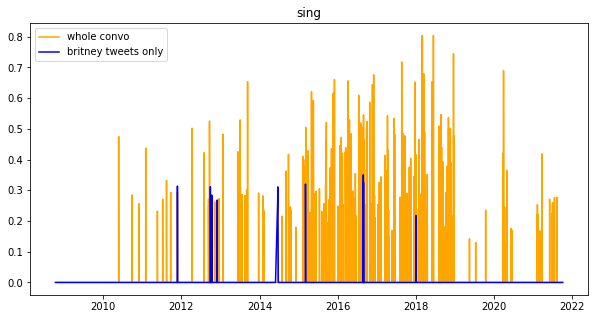

In [100]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'sing'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'freebritney')

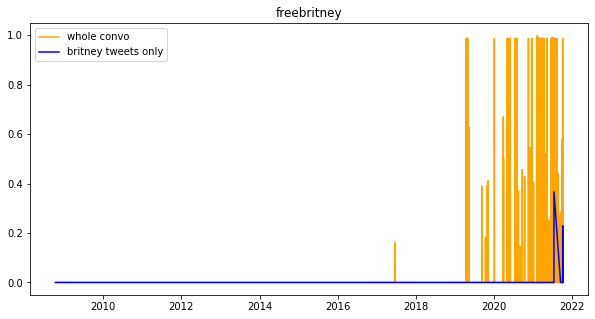

In [101]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'freebritney'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'father')

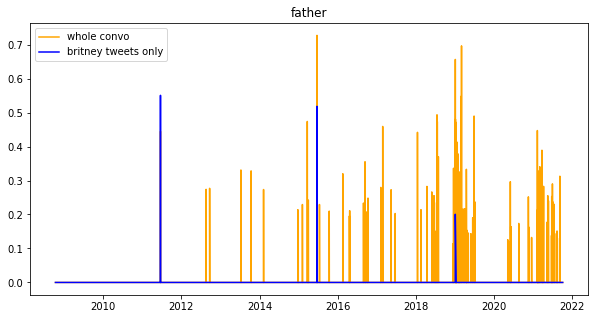

In [103]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'father'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'conservatorship')

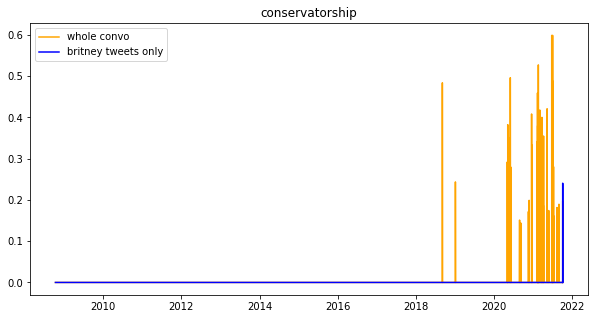

In [104]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'conservatorship'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'children')

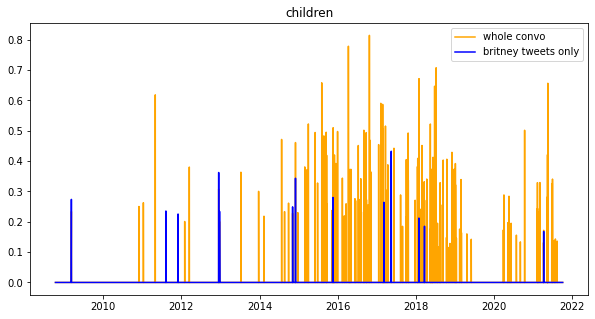

In [105]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'children'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'artist')

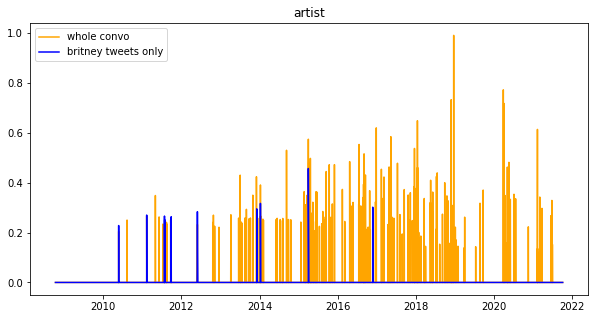

In [106]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'artist'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'body')

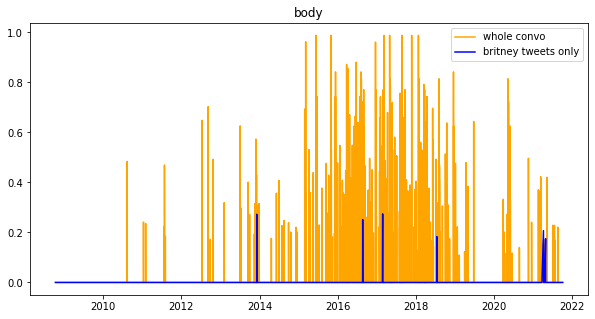

In [107]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'body'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'crazy')

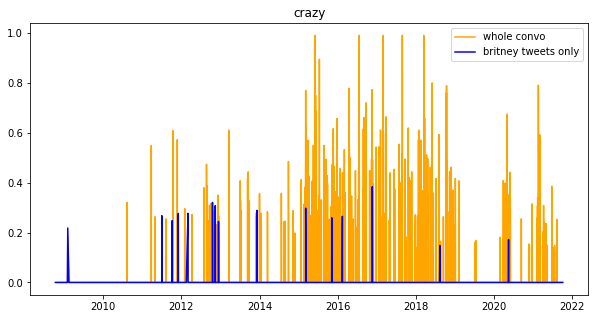

In [108]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'crazy'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'paparazzi')

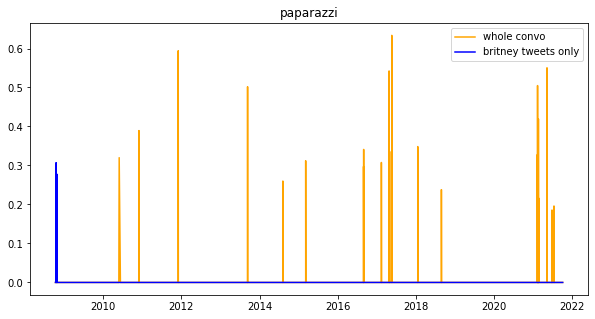

In [109]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
# not tweeted by britney: legal, control, bipolar, mental, breakdown, bald, tabloid
# almost nobody tweets about tmz
word = 'paparazzi'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'jaime')

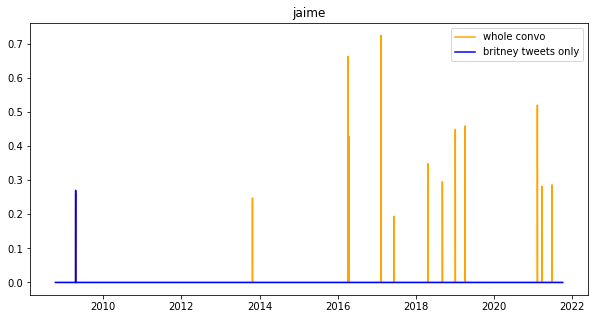

In [110]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'jaime'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'sister')

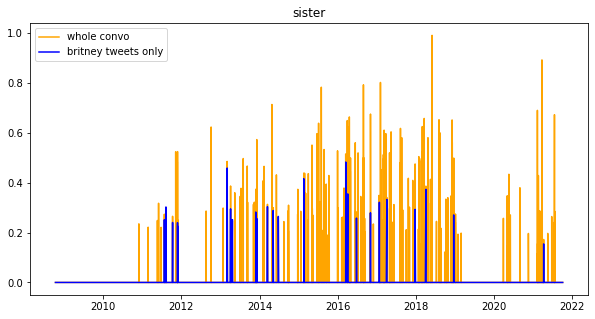

In [111]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'sister'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'family')

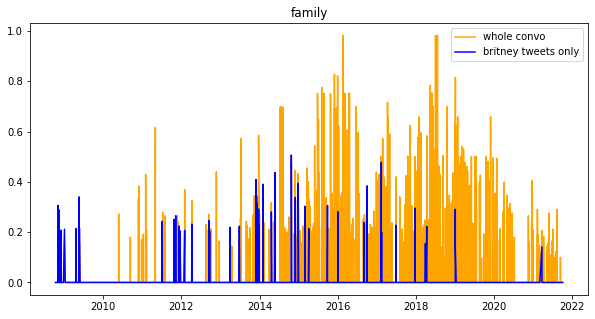

In [112]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'family'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'fat')

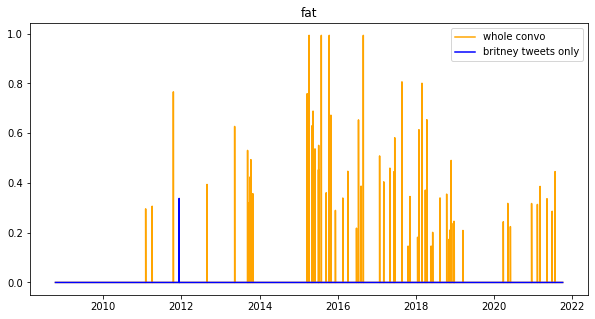

In [113]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'fat'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'justice')

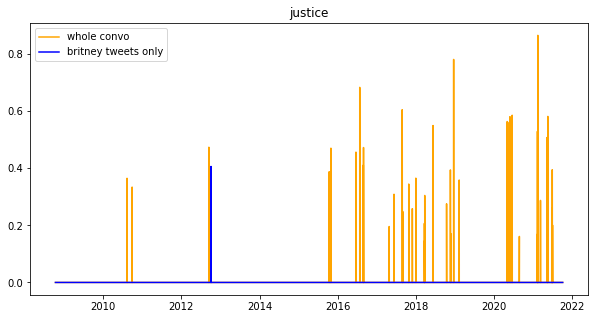

In [156]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'justice'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)

Text(0.5, 1.0, 'pretty')

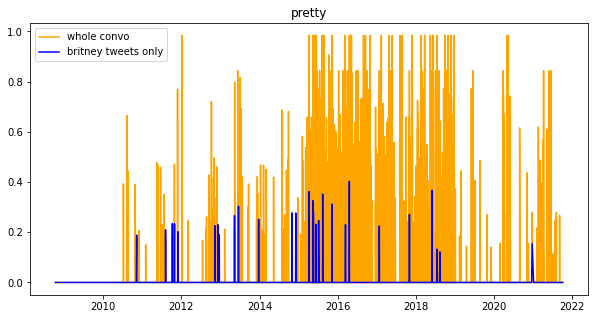

In [157]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
word = 'pretty'
dts = pd.to_datetime(content['created_at'])
dts_britney = pd.to_datetime(content_britney['created_at'])
plt.plot(dts, get_feature_importance_ts(word), color='orange', label='whole convo')
plt.plot(dts_britney, get_feature_importance_ts_britney(word), color='blue', label='britney tweets only')
plt.legend()
plt.title(word)